# Solver Performance Comparisons

This notebook demonstrates our testing and comparing the performance of different general purpose solvers.

### Imports and Setup

In [15]:
# Standard library
import os

# Third party
import matplotlib.pyplot as plt
import matplotlib_inline

import pandas as pd
import seaborn as sns 

# Local
import flexibleSubsetSelection as fss

# Initialize notebook settings
sns.set_theme() # set seaborn theme
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # vector plots
%matplotlib inline 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
directory = "../data/Fig4-performance" # data directory for this notebook
file = "performanceData.csv"           # performance data file name
subsetSize = 10                        # size of subset selected
verbose = False                        # verbosity of solvers
seeds = [123, 231, 321, 132, 213]      # random generation seeds
numTrials = 5                          # number of trials per condition
algorithms = ["greedySwap", "bestOfRandom", "averageOfRandom"]

In [17]:
for datasetLength in range(100, 1100, 100):
    # Create dataset
    dataset = fss.Dataset(randTypes = "uniform", 
                          size = (datasetLength, 10), 
                          seed = seeds[0])

    # Preprocess dataset for objectives
    dataset.preprocess(mean=fss.metric.mean)
    dataset.preprocess(range=fss.metric.range)
    dataset.discretize(bins=6, array="coverage")
    dataset.encode(array="coverage")

    # Initialize coverage loss function
    coverageLoss = fss.UniCriterion(objective = fss.objective.discreteCoverage,
                                    solveArray = "coverage")

    # Initialize mean and range loss function
    objectives = [fss.objective.preserveMetric, fss.objective.preserveMetric]
    parameters = [{"metric": fss.metric.mean, "datasetMetric": dataset.mean},
                  {"metric": fss.metric.range, "datasetMetric": dataset.range}]
    weights = [1.0, 1.0]
    meanRangeLoss = fss.MultiCriterion(objectives, parameters, weights)

    # Initialize mean, range, and coverage loss function
    objectives = [fss.objective.preserveMetric, fss.objective.preserveMetric, 
                  fss.objective.discreteCoverage]
    parameters = [{"metric": fss.metric.mean, "datasetMetric": dataset.mean},
                  {"metric": fss.metric.range, "datasetMetric": dataset.range},
                  {"solveArray": "coverage"}]
    weights = [1.0, 1.0, 1.0]
    meanRangeCoverageLoss = fss.MultiCriterion(objectives, parameters, weights)

    lossFunctions = [coverageLoss, meanRangeLoss, meanRangeCoverageLoss]

    # Initialize solver
    solver = fss.Solver(algorithm = fss.algorithm.greedySwap, 
                        lossFunction = lossFunctions[0], 
                        logPath = os.path.join(directory, file))

    for i in range(numTrials):
        for j, lossFunction in enumerate(lossFunctions):
            for k, algorithm in enumerate(algorithms):
                solver.lossFunction = lossFunction
                solver.algorithm = getattr(fss.algorithm, algorithm)
                subset = solver.solve(dataset, subsetSize=subsetSize)

Solved for subset of size 10x10 in 0.01s with -100.0 loss.
Solved for subset of size 10x10 in 0.0s with -100.0 loss.
Solved for subset of size 10x10 in 0.0s with -100.0 loss.
Solved for subset of size 10x10 in 0.02s with 3.13 loss.
Solved for subset of size 10x10 in 0.0s with 6.25 loss.
Solved for subset of size 10x10 in 0.0s with 9.66 loss.
Solved for subset of size 10x10 in 0.03s with -97.01 loss.
Solved for subset of size 10x10 in 0.0s with -94.16 loss.
Solved for subset of size 10x10 in 0.01s with -90.43 loss.
Solved for subset of size 10x10 in 0.02s with -100.0 loss.
Solved for subset of size 10x10 in 0.0s with -100.0 loss.
Solved for subset of size 10x10 in 0.0s with -100.0 loss.
Solved for subset of size 10x10 in 0.02s with 3.34 loss.
Solved for subset of size 10x10 in 0.0s with 5.74 loss.
Solved for subset of size 10x10 in 0.0s with 9.55 loss.
Solved for subset of size 10x10 in 0.04s with -96.11 loss.
Solved for subset of size 10x10 in 0.01s with -93.82 loss.
Solved for subset 

Text(0, 0.5, 'Computation Time (s)')

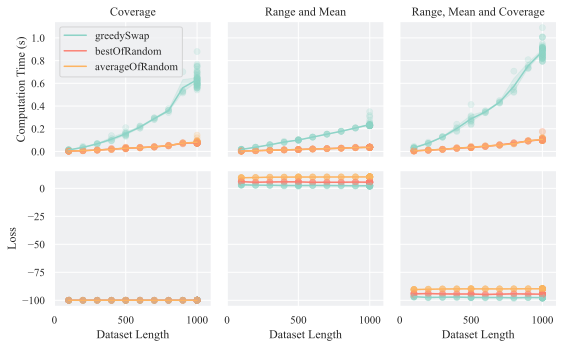

In [50]:
# Initialize color and plot settings
color = fss.plot.Color()
fss.plot.initialize(color)

# Create figure
fig, axs = plt.subplots(nrows=2, 
                        ncols=3, 
                        figsize=(8, 5), 
                        sharey="row", 
                        sharex=True)

# Define your list of objectives
titles = ["Coverage", "Range and Mean", "Range, Mean and Coverage"]
palette = color.getPalette(algorithms, ["green", "orange", "yellow"])

df = pd.read_csv(os.path.join(directory, file))

for i, objective in enumerate(df['Loss Function'].unique()):
    for j, metric in enumerate(["Computation Time", "Loss"]):
        data = df[(df["Loss Function"] == objective) & 
                  (df["Subset Length"] == 10) & 
                  (df["Dataset Width"] == 10)]
                  
        sns.scatterplot(x="Dataset Length", 
                        y=metric, 
                        alpha=0.2,
                        hue="Algorithm", 
                        palette=palette, 
                        data=data,
                        ax=axs[j, i], 
                        s=40, 
                        edgecolor=None)
        
        sns.lineplot(x="Dataset Length", 
                     y=metric,
                     hue="Algorithm", 
                     palette=palette, 
                     data=data,
                     ax=axs[j, i])
        
        axs[j, i].set_xlim([0, 1100])
        axs[j, i].legend([]).set_visible(False)
    
    axs[0, i].set_title(titles[i], fontsize=12)

# Adjust legend for the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()
axs[0, 0].legend(handles[len(algorithms):], labels[len(algorithms):])

axs[1, 0].set_ylabel("Loss")
axs[0, 0].set_ylabel("Computation Time (s)")

In [45]:
# Create dataset
dataset = fss.Dataset(randTypes = "uniform", 
                        size = (500, 10), 
                        seed = seeds[0])

# Preprocess dataset for objectives
dataset.preprocess(mean=fss.metric.mean)
dataset.preprocess(range=fss.metric.range)
dataset.discretize(bins=6, array="coverage")
dataset.encode(array="coverage")

# Initialize coverage loss function
coverageLoss = fss.UniCriterion(objective = fss.objective.discreteCoverage,
                                solveArray = "coverage")

# Initialize mean and range loss function
objectives = [fss.objective.preserveMetric, fss.objective.preserveMetric]
parameters = [{"metric": fss.metric.mean, "datasetMetric": dataset.mean},
                {"metric": fss.metric.range, "datasetMetric": dataset.range}]
weights = [1.0, 1.0]
meanRangeLoss = fss.MultiCriterion(objectives, parameters, weights)

# Initialize mean, range, and coverage loss function
objectives = [fss.objective.preserveMetric, fss.objective.preserveMetric, 
                fss.objective.discreteCoverage]
parameters = [{"metric": fss.metric.mean, "datasetMetric": dataset.mean},
                {"metric": fss.metric.range, "datasetMetric": dataset.range},
                {"solveArray": "coverage"}]
weights = [1.0, 1.0, 1.0]
meanRangeCoverageLoss = fss.MultiCriterion(objectives, parameters, weights)

lossFunctions = [coverageLoss, meanRangeLoss, meanRangeCoverageLoss]

# Initialize solver
solver = fss.Solver(algorithm = fss.algorithm.greedySwap, 
                    lossFunction = lossFunctions[0], 
                    logPath = os.path.join(directory, file))

for subsetSize in range(10, 500, 100):
    for i in range(numTrials):
        for j, lossFunction in enumerate(lossFunctions):
            for k, algorithm in enumerate(algorithms):
                print(i, j, k)
                solver.lossFunction = lossFunction
                solver.algorithm = getattr(fss.algorithm, algorithm)
                subset = solver.solve(dataset, subsetSize=subsetSize)

0 0 0
Solved for subset of size 10x10 in 0.17s with -100.0 loss.
0 0 1
Solved for subset of size 10x10 in 0.02s with -100.0 loss.
0 0 2
Solved for subset of size 10x10 in 0.03s with -100.0 loss.
0 1 0
Solved for subset of size 10x10 in 0.1s with 1.96 loss.
0 1 1
Solved for subset of size 10x10 in 0.02s with 6.09 loss.
0 1 2
Solved for subset of size 10x10 in 0.02s with 10.11 loss.
0 2 0
Solved for subset of size 10x10 in 0.31s with -97.34 loss.
0 2 1
Solved for subset of size 10x10 in 0.04s with -94.62 loss.
0 2 2
Solved for subset of size 10x10 in 0.03s with -89.73 loss.
1 0 0
Solved for subset of size 10x10 in 0.14s with -100.0 loss.
1 0 1
Solved for subset of size 10x10 in 0.04s with -100.0 loss.
1 0 2
Solved for subset of size 10x10 in 0.04s with -100.0 loss.
1 1 0
Solved for subset of size 10x10 in 0.1s with 2.42 loss.
1 1 1
Solved for subset of size 10x10 in 0.02s with 6.09 loss.
1 1 2
Solved for subset of size 10x10 in 0.02s with 10.13 loss.
1 2 0
Solved for subset of size 10x10

Text(0, 0.5, 'Computation Time (s)')

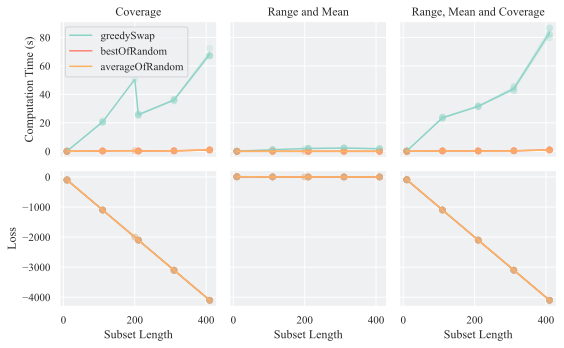

In [51]:
# Initialize color and plot settings
color = fss.plot.Color()
fss.plot.initialize(color)

# Create figure
fig, axs = plt.subplots(nrows=2, 
                        ncols=3, 
                        figsize=(8, 5), 
                        sharey="row", 
                        sharex=True)

# Define your list of objectives
titles = ["Coverage", "Range and Mean", "Range, Mean and Coverage"]
palette = color.getPalette(algorithms, ["green", "orange", "yellow"])

df = pd.read_csv(os.path.join(directory, file))

for i, objective in enumerate(df['Loss Function'].unique()):
    for j, metric in enumerate(["Computation Time", "Loss"]):
        data = df[(df["Loss Function"] == objective) & 
                  (df["Dataset Length"] == 500) & 
                  (df["Dataset Width"] == 10)]
                  
        sns.scatterplot(x="Subset Length", 
                        y=metric, 
                        alpha=0.2,
                        hue="Algorithm", 
                        palette=palette, 
                        data=data,
                        ax=axs[j, i], 
                        s=40, 
                        edgecolor=None)
        
        sns.lineplot(x="Subset Length", 
                     y=metric,
                     hue="Algorithm", 
                     palette=palette, 
                     data=data,
                     ax=axs[j, i])
        
        # axs[j, i].set_xlim([0, 1100])
        axs[j, i].legend([]).set_visible(False)
    
    axs[0, i].set_title(titles[i], fontsize=12)

# Adjust legend for the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()
axs[0, 0].legend(handles[len(algorithms):], labels[len(algorithms):])

axs[1, 0].set_ylabel("Loss")
axs[0, 0].set_ylabel("Computation Time (s)")

In [53]:
for datasetWidth in range(2, 20, 2):
    # Create dataset
    dataset = fss.Dataset(randTypes = "uniform", 
                          size = (1000, datasetWidth), 
                          seed = seeds[0])

    # Preprocess dataset for objectives
    dataset.preprocess(mean=fss.metric.mean)
    dataset.preprocess(range=fss.metric.range)
    dataset.discretize(bins=6, array="coverage")
    dataset.encode(array="coverage")

    # Initialize coverage loss function
    coverageLoss = fss.UniCriterion(objective = fss.objective.discreteCoverage,
                                    solveArray = "coverage")

    # Initialize mean and range loss function
    objectives = [fss.objective.preserveMetric, fss.objective.preserveMetric]
    parameters = [{"metric": fss.metric.mean, "datasetMetric": dataset.mean},
                  {"metric": fss.metric.range, "datasetMetric": dataset.range}]
    weights = [1.0, 1.0]
    meanRangeLoss = fss.MultiCriterion(objectives, parameters, weights)

    # Initialize mean, range, and coverage loss function
    objectives = [fss.objective.preserveMetric, fss.objective.preserveMetric, 
                  fss.objective.discreteCoverage]
    parameters = [{"metric": fss.metric.mean, "datasetMetric": dataset.mean},
                  {"metric": fss.metric.range, "datasetMetric": dataset.range},
                  {"solveArray": "coverage"}]
    weights = [1.0, 1.0, 1.0]
    meanRangeCoverageLoss = fss.MultiCriterion(objectives, parameters, weights)

    lossFunctions = [coverageLoss, meanRangeLoss, meanRangeCoverageLoss]

    # Initialize solver
    solver = fss.Solver(algorithm = fss.algorithm.greedySwap, 
                        lossFunction = lossFunctions[0], 
                        logPath = os.path.join(directory, file))

    for i in range(numTrials):
        for j, lossFunction in enumerate(lossFunctions):
            for k, algorithm in enumerate(algorithms):
                solver.lossFunction = lossFunction
                solver.algorithm = getattr(fss.algorithm, algorithm)
                subset = solver.solve(dataset, subsetSize=10)

Solved for subset of size 10x2 in 0.19s with -20.0 loss.
Solved for subset of size 10x2 in 0.05s with -20.0 loss.
Solved for subset of size 10x2 in 0.05s with -20.0 loss.
Solved for subset of size 10x2 in 0.23s with 0.09 loss.
Solved for subset of size 10x2 in 0.04s with 0.28 loss.
Solved for subset of size 10x2 in 0.04s with 2.08 loss.
Solved for subset of size 10x2 in 0.41s with -19.97 loss.
Solved for subset of size 10x2 in 0.06s with -19.58 loss.
Solved for subset of size 10x2 in 0.07s with -17.98 loss.
Solved for subset of size 10x2 in 0.21s with -20.0 loss.
Solved for subset of size 10x2 in 0.04s with -20.0 loss.
Solved for subset of size 10x2 in 0.04s with -20.0 loss.
Solved for subset of size 10x2 in 0.23s with 0.03 loss.
Solved for subset of size 10x2 in 0.04s with 0.48 loss.
Solved for subset of size 10x2 in 0.04s with 2.06 loss.
Solved for subset of size 10x2 in 0.45s with -19.91 loss.
Solved for subset of size 10x2 in 0.06s with -19.6 loss.
Solved for subset of size 10x2 in

Text(0, 0.5, 'Computation Time (s)')

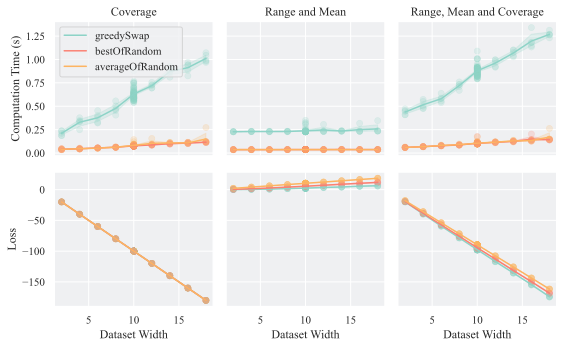

In [54]:
# Initialize color and plot settings
color = fss.plot.Color()
fss.plot.initialize(color)

# Create figure
fig, axs = plt.subplots(nrows=2, 
                        ncols=3, 
                        figsize=(8, 5), 
                        sharey="row", 
                        sharex=True)

# Define your list of objectives
titles = ["Coverage", "Range and Mean", "Range, Mean and Coverage"]
palette = color.getPalette(algorithms, ["green", "orange", "yellow"])

df = pd.read_csv(os.path.join(directory, file))

for i, objective in enumerate(df['Loss Function'].unique()):
    for j, metric in enumerate(["Computation Time", "Loss"]):
        data = df[(df["Loss Function"] == objective) & 
                  (df["Dataset Length"] == 1000) & 
                  (df["Subset Length"] == 10)]

        sns.scatterplot(x="Dataset Width", 
                        y=metric, 
                        alpha=0.2,
                        hue="Algorithm", 
                        palette=palette, 
                        data=data,
                        ax=axs[j, i], 
                        s=40, 
                        edgecolor=None)
        
        sns.lineplot(x="Dataset Width", 
                     y=metric,
                     hue="Algorithm", 
                     palette=palette, 
                     data=data,
                     ax=axs[j, i])
        
        # axs[j, i].set_xlim([0, 1100])
        axs[j, i].legend([]).set_visible(False)
    
    axs[0, i].set_title(titles[i], fontsize=12)

# Adjust legend for the first subplot
handles, labels = axs[0, 0].get_legend_handles_labels()
axs[0, 0].legend(handles[len(algorithms):], labels[len(algorithms):])

axs[1, 0].set_ylabel("Loss")
axs[0, 0].set_ylabel("Computation Time (s)")